In [120]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline



In [121]:
train_path = 'DATASET/TRAIN'

test_path = 'DATASET/TEST'

In [122]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(300,300), classes=['downdog', 'tree','plank', 'goddess'], batch_size=10)

Found 829 images belonging to 4 classes.


In [123]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(300,300), classes=['downdog', 'tree','plank', 'goddess'], batch_size=10, shuffle=False)

Found 361 images belonging to 4 classes.


In [124]:
imgs, labels = next(train_batches)

In [125]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

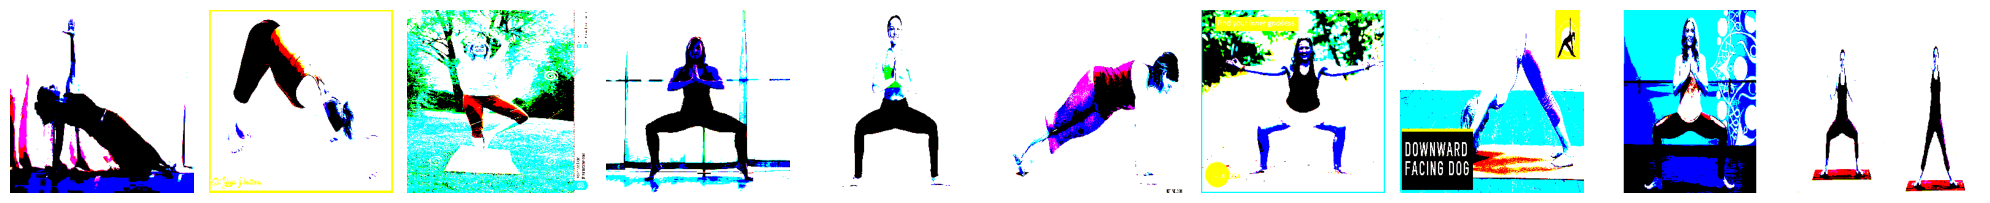

In [126]:
plotImages(imgs)

In [127]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(300,300,3)),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=4, activation='softmax'),
])

In [128]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 150, 150, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 37, 37, 128)      

In [129]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [130]:
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True

In [131]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches)//4,
    validation_data = test_batches,
    validation_steps = len(test_batches)//4,epochs=10)

Epoch 1/10
 7/20 [=========>....................] - ETA: 6s - loss: 40.4279 - accuracy: 0.2714

C:\Users\samar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 17s 725ms/step - loss: 34.7053 - accuracy: 0.3250 - val_loss: 5.1849 - val_accuracy: 0.3444
Epoch 2/10
20/20 [==============================] - 14s 677ms/step - loss: 5.4938 - accuracy: 0.4850 - val_loss: 0.2127 - val_accuracy: 0.8889
Epoch 3/10
20/20 [==============================] - 15s 752ms/step - loss: 2.3614 - accuracy: 0.6030 - val_loss: 1.3036 - val_accuracy: 0.6222
Epoch 4/10
20/20 [==============================] - 15s 769ms/step - loss: 0.8670 - accuracy: 0.7739 - val_loss: 1.6910 - val_accuracy: 0.5556
Epoch 5/10
20/20 [==============================] - 15s 733ms/step - loss: 0.5960 - accuracy: 0.8442 - val_loss: 1.5649 - val_accuracy: 0.5556
Epoch 6/10
20/20 [==============================] - 15s 753ms/step - loss: 0.6885 - accuracy: 0.8500 - val_loss: 0.5661 - val_accuracy: 0.8444
Epoch 7/10
20/20 [==============================] - 14s 677ms/step - loss: 0.3959 - accuracy: 0.8800 - val_loss: 0.5317 - val_accuracy: 0.8000
Epoch 8/1

In [138]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [139]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [141]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [143]:
test_batches.class_indices

{'downdog': 0, 'tree': 1, 'plank': 2, 'goddess': 3}

[[80  0 16  1]
 [ 9 53  5  2]
 [19  1 95  0]
 [15  4 23 38]]


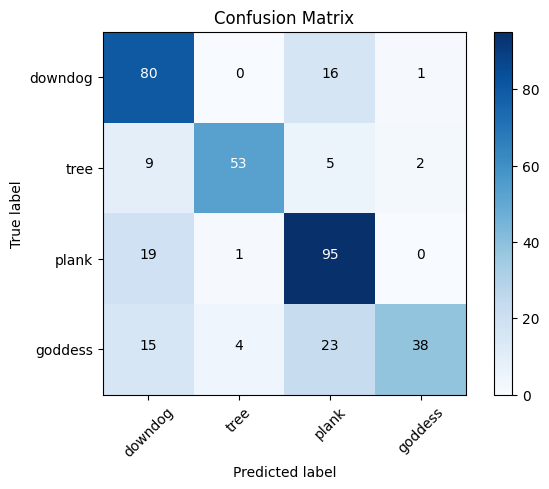

In [144]:
cm_plot_labels = ['downdog', 'tree', 'plank', 'goddess']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [147]:
accuracy = np.trace(cm) / np.sum(cm)
# print(accuracy)